In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from h5py import File

sns.set(context='paper', rc={'figure.figsize':(14,10)})

HYP_DICT = {0: 'W', 1: 'N1', 2: 'N2', 3: 'N3', 4: 'R'}

In [3]:
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
# display(df.head())
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/avg_kw21_rnn128/20201209_025443/SSC-WSC_test_predictions.pkl',
 'experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21_rnn128_cyclic/20201212_150902/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [4]:
selected_experiment = 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl'
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 0').sort_values('Balanced accuracy', ascending=False))
print(f"Unique classes: {df_preds['Diagnosis'].unique()}")
print(f"Window unique classes: {df_preds['Window'].unique()}")
print(f"Case unique classes: {df_preds['Case'].unique()}")
display(df_preds.query('Label == 1'))

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
52,A1038_4 172720.h5,A1038_4 172720,1 s,all,0.849057,0.894873,0.795451,0.830931,0.806470,0.894873,...,0.548148,0.986667,75.0,0.985782,0.971963,1.000000,104.0,A1038_4 172720,'NON-NARCOLEPSY CONTROL',0
508,SSC_6856_1.h5,SSC_6856_1,1 s,all,0.876377,0.892037,0.811801,0.784684,0.733296,0.892037,...,0.480519,1.000000,37.0,0.880000,0.785714,1.000000,33.0,SSC_6856_1,'NON-NARCOLEPSY CONTROL',0
150,C1040_4 181859.h5,C1040_4 181859,1 s,all,0.883333,0.888253,0.817163,0.776490,0.769768,0.888253,...,0.842593,0.900990,101.0,0.973294,0.959064,0.987952,166.0,C1040_4 181859,'NON-NARCOLEPSY CONTROL',0
507,SSC_6854_1.h5,SSC_6854_1,1 s,all,0.831891,0.884168,0.776560,0.818131,0.812352,0.884168,...,0.847134,1.000000,133.0,0.921348,0.901099,0.942529,87.0,SSC_6854_1,'NON-NARCOLEPSY CONTROL',0
220,C9145_2 172540.h5,C9145_2 172540,1 s,all,0.840263,0.883908,0.773819,0.750679,0.725847,0.883908,...,0.407407,1.000000,55.0,0.945736,0.978610,0.915000,200.0,C9145_2 172540,'NON-NARCOLEPSY CONTROL',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,SSC_5280_1.h5,SSC_5280_1,1 s,all,0.474593,0.530022,0.314027,0.395287,0.529237,0.530022,...,0.940476,0.763285,207.0,0.145631,0.078534,1.000000,15.0,SSC_5280_1,'NON-NARCOLEPSY CONTROL',0
514,SSC_6927_1.h5,SSC_6927_1,1 s,all,0.745384,0.509478,0.571534,0.427622,0.547962,0.407582,...,0.000000,0.000000,0.0,0.907104,0.861592,0.957692,260.0,SSC_6927_1,'NON-NARCOLEPSY CONTROL',0
120,C0605_4 173848.h5,C0605_4 173848,1 s,all,0.544211,0.508400,0.353138,0.490093,0.615286,0.508400,...,0.000000,0.000000,0.0,0.500000,0.774194,0.369231,65.0,C0605_4 173848,'NON-NARCOLEPSY CONTROL',0
411,SSC_5458_1.h5,SSC_5458_1,1 s,all,0.581797,0.489882,0.341106,0.294390,0.314674,0.293929,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,SSC_5458_1,'NON-NARCOLEPSY CONTROL',0


Unique classes: ["'NON-NARCOLEPSY CONTROL'" "'T1 NARCOLEPSY'" "'OTHER HYPERSOMNIA'"]
Window unique classes: ['1 s']
Case unique classes: ['all']


,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
299,SSC_1958_1.h5,SSC_1958_1,1 s,all,0.656039,0.700787,0.480362,0.477659,0.486116,0.700787,...,0.292453,0.756098,41.0,0.470588,0.307692,1.000000,16.0,SSC_1958_1,'T1 NARCOLEPSY',1
300,SSC_2605_1.h5,SSC_2605_1,1 s,all,0.681190,0.622985,0.568261,0.466644,0.542127,0.622985,...,0.843836,0.950617,324.0,0.023810,0.012048,1.000000,1.0,SSC_2605_1,'T1 NARCOLEPSY',1
306,SSC_4723_1.h5,SSC_4723_1,1 s,all,0.662694,0.680094,0.549286,0.599497,0.615273,0.680094,...,0.994536,0.719368,253.0,0.896175,0.828283,0.976190,168.0,SSC_4723_1,'T1 NARCOLEPSY',1
315,SSC_4813_1.h5,SSC_4813_1,1 s,all,0.735939,0.597847,0.644742,0.610992,0.633843,0.597847,...,0.000000,0.000000,5.0,0.859756,0.933775,0.796610,177.0,SSC_4813_1,'T1 NARCOLEPSY',1
355,SSC_5139_1.h5,SSC_5139_1,1 s,all,0.649302,0.714275,0.498503,0.585201,0.617166,0.714275,...,0.447619,0.921569,51.0,0.836449,0.736626,0.967568,185.0,SSC_5139_1,'T1 NARCOLEPSY',1
397,SSC_5335_1.h5,SSC_5335_1,1 s,all,0.752821,0.768032,0.678440,0.734077,0.737968,0.768032,...,0.795181,0.985075,134.0,0.759322,0.666667,0.881890,127.0,SSC_5335_1,'T1 NARCOLEPSY',1
499,SSC_6542_1.h5,SSC_6542_1,1 s,all,0.821542,0.879353,0.745264,0.708109,0.721268,0.879353,...,0.920863,0.955224,134.0,0.883168,0.854406,0.913934,244.0,SSC_6542_1,'T1 NARCOLEPSY',1


In [5]:
selected_record = 'SSC_6542_1.h5'
record = predictions[selected_record]
record.keys()
logits = record['logits']
target = record['true'].argmax(1).repeat(30)
print(logits.shape)
print(target.shape)

(29100, 5)
(29100,)


In [6]:
# target = []
# logits = []
# for idx, (r, d) in enumerate(predictions.items()):
#     if idx < 50:
#         target.append(d['true'].argmax(-1).repeat(30))
#         logits.append(d['logits'])
#     else:
#         break
# target = np.concatenate(target, axis=0)
# logits = np.concatenate(logits, axis=0)
# print('logits.shape:', logits.shape)
# print('target.shape:', target.shape)

### Bayesian Information Criterion

A metric useful for model selection as it combines a model log likelihood under the data with a penalization on the number of parameters.
Formally defined as
\begin{equation}
    \text{BIC} = k \ln (n) - 2 \ln (\ell)
\end{equation}
where \(k\) is the number of estimated parameters, $n$ is the sample size, and $\ell$ is the likelihood function of the data $x$ given the optimal parameters $theta$ and the model $M$: $\ell = p\left( x \mid \theta, M \right)$.

[[  3.05891763  -8.99596935   2.77173603  -8.97177531]
 [ -1.57358593 -10.8687508   -8.15599237 -17.74987618]
 [ -5.84466422 -11.67388078  -9.77319262 -24.44259504]
 [ -8.12194983 -13.70864403 -16.09621033 -26.72570216]
 [-10.36133653 -15.51257073 -17.07625684 -27.93172173]
 [-11.83893726 -16.04969228 -19.9612095  -29.78936413]
 [-13.45824322 -16.74309524 -21.20623242 -31.12758128]
 [-13.1401947  -17.17382702 -21.85548126 -31.18898317]
 [-14.960707   -17.36032316 -23.40705506 -31.95708355]
 [-15.27782586 -17.39275282 -23.93436316 -32.75719562]
 [-16.15331183 -18.36651134 -24.36314144 -33.05866582]
 [-16.85709181 -18.57018254 -24.76526269 -33.27536066]
 [-17.10117366 -18.68220805 -25.02659511 -33.41945778]
 [-17.35073315 -18.92813069 -25.30916283 -33.5727275 ]
 [-17.97480334 -19.29706885 -25.57249714 -33.89023968]
 [-17.95231228 -19.60343331 -25.86168331 -33.91870415]
 [-18.34233148 -19.74778816 -25.98391032 -34.06049989]
 [-18.45034009 -19.77460111 -26.23187759 -34.05683989]
 [-18.5862

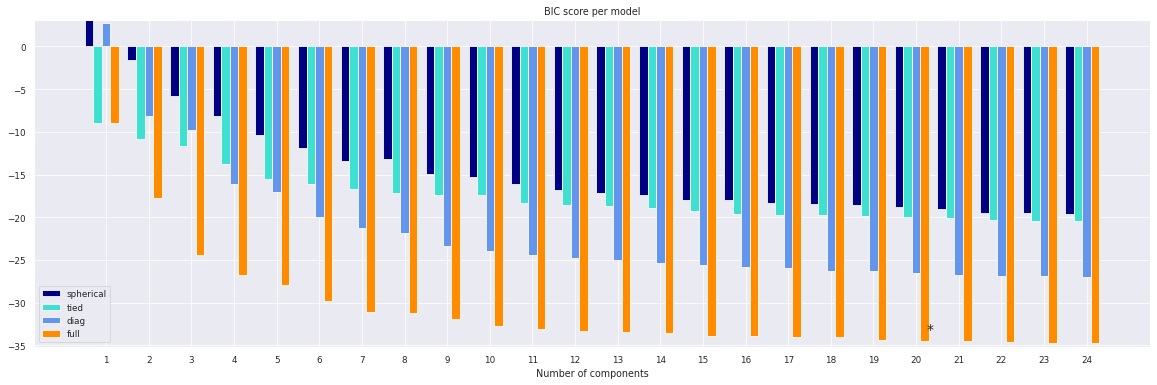

In [7]:
import itertools
from scipy import linalg
from sklearn import mixture

X = logits

lowest_bic = np.infty
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic = np.full((len(cv_types), len(n_components_range)), np.infty)
for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic[i, j] = gmm.bic(X)
        if bic[i, j] < lowest_bic:
            lowest_bic = bic[i, j]
            best_gmm = gmm

bic = bic.T
bic /= X.shape[0]
# bic -= bic.min(axis=0)
_bic = np.zeros(bic.shape)
_bic[:, 1:] += bic[:, :-1]
_bic[:, 1:] -= bic[:, 1:]
# bic = _bic
print(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(20, 6))
spl = plt.subplot(1, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[:, i], width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.show()

In [8]:
Y = clf.predict(X)
y = clf.predict_proba(X)
y.shape

(29100, 23)

(10, 5)


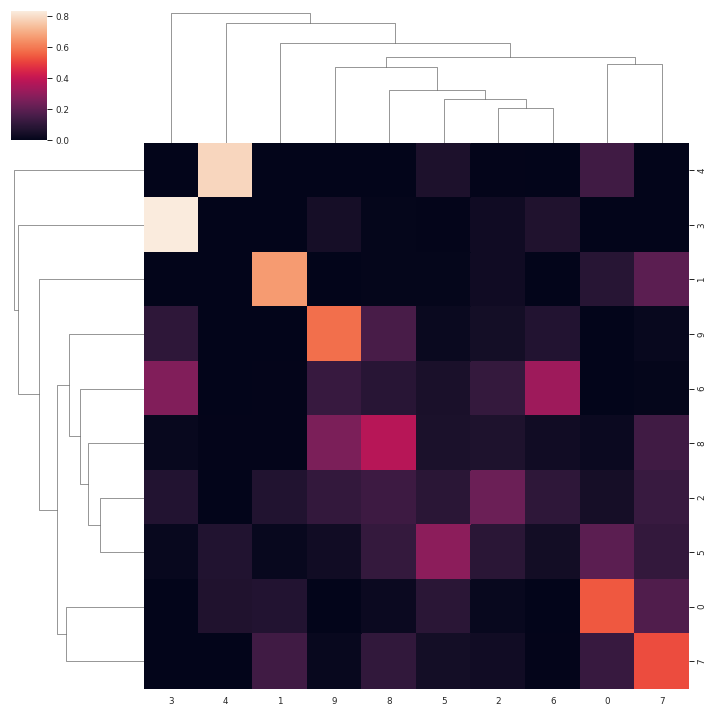

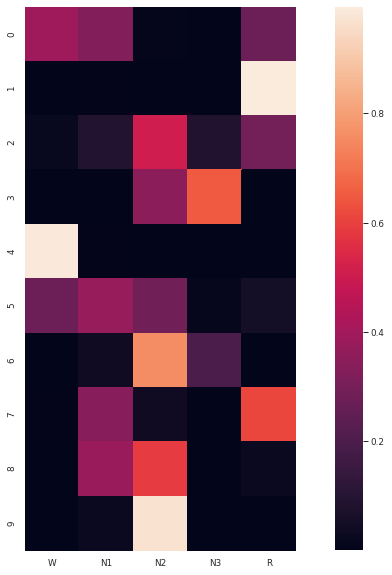

In [10]:
from utils.evaluate_performance import transition_matrix

# Fit GMM
n_components = 10
gmm = mixture.GaussianMixture(
    n_components=n_components,
    covariance_type='full'
)
gmm.fit(X)
Y = gmm.predict(X)
TM = transition_matrix(Y, n_components)
# TM = TM[[5, 2, 8, 1, 7, 9, 3, 6, 0, 4], [3, 6, 2, 8, 1, 7, 9, 5, 0, 4]]

# Draw clustermap
# sns.heatmap(TM)
sns.clustermap(TM, standard_scale=None)

# Draw fractional occupancy across the night
frac_occ = []
for i in range(n_components):
    frac_occ.append(np.mean(X[Y == i, :], axis=0))
frac_occ = np.stack(frac_occ, axis=0)
print(frac_occ.shape)
fig, ax = plt.subplots()
sns.heatmap(frac_occ)
ax.set_xticklabels(['W', 'N1', 'N2', 'N3', 'R'])
ax.set_aspect('equal')
# sns.clustermap(TM)        

In [177]:
np.dot(TM.sum(axis=1, keepdims=True), TM.sum(axis=0, keepdims=True)).shape
with np.printoptions(precision=4, suppress=True):
    print(TM)

[[0.2967 0.0905 0.0176 0.0176 0.1936 0.0723 0.1062 0.0459 0.0446 0.115 ]
 [0.0968 0.2258 0.075  0.075  0.0513 0.0013 0.133  0.1086 0.1001 0.133 ]
 [0.0047 0.0331 0.835  0.0007 0.0002 0.     0.0022 0.047  0.0694 0.0079]
 [0.0086 0.0337 0.0007 0.6639 0.0858 0.0007 0.1974 0.0007 0.0013 0.0073]
 [0.09   0.0186 0.     0.0758 0.5444 0.0687 0.1741 0.0009 0.0012 0.0263]
 [0.0628 0.003  0.     0.0012 0.1423 0.7872 0.0018 0.     0.0006 0.0012]
 [0.0414 0.0388 0.0017 0.1431 0.1231 0.0007 0.5204 0.0169 0.004  0.1098]
 [0.0233 0.0403 0.1025 0.0003 0.0006 0.     0.0175 0.5824 0.0764 0.1567]
 [0.061  0.1136 0.2714 0.0039 0.0019 0.0013 0.0091 0.1214 0.326  0.0903]
 [0.0622 0.0673 0.0179 0.0062 0.0241 0.0033 0.1427 0.2638 0.0362 0.3761]]


In [168]:
np.savetxt('TM.txt', TM)

In [180]:
def modularity_dir(A, gamma=1):
    N = A.shape[0]
    Ki = A.sum(axis=0, keepdims=True)
    Ko = A.sum(axis=1, keepdims=True)
    m = Ki.sum()
    b = A - gamma * np.dot(Ko, Ki).T / m
    with np.printoptions(precision=3, suppress=True):
        print(b)
    B = b + b.T
    Ci = np.ones(N)
    cn = 1
    U = [1, 0]
    
    ind = np.arange(0, N)
    Bg = B
    Ng = N
    while U[0]:
        D, V = np.linalg.eig(Bg)
        with np.printoptions(precision=5, suppress=True):
            print(Bg)
        eig_idx = D.argsort()   
        D = D[eig_idx]
        V = V[:,eig_idx]
        print(D)
        break
        i1 = np.argmax(np.real(D))
        v1 = V[:, i1]
        S = np.ones(Ng)
        S[v1 < 0] = -1
        q = np.linalg.multi_dot([S.T, Bg, S])
        if q > 1e-10:
            qmax = q
            Bg[np.eye(Ng, dtype=np.bool)] = 0
            indg = np.ones(Ng)
            Sit = S
            while indg.any():
                Qit = qmax - 4 * Sit * np.dot(Bg, Sit)
                imax = np.argmax(Qit * indg)
                qmax = np.max(Qit * indg)
                Sit[imax] = -Sit[imax]
                indg[imax] = np.nan
                if qmax > q:
                    q = qmax
                    S = Sit
                
                if np.abs(S.sum()) == Ng:
                    U.pop(0)
#                     U[0] = None
                    print(U)
                else:
                    cn += 1
                    Ci[ind[S.squeeze() == 1]] = U[0]
                    Ci[ind[S.squeeze() == -1]] = cn
                    U = [cn] + U
                    print(U)
        else:
            U.pop(0)
            print(U)
#             U[0] = None
        
        ind = np.where(Ci == U[0])[0]
        bg = B[ind, ind]
        Bg = bg - np.diag(bg.sum(axis=0))
        Ng = ind.shape[0]
    
    s = Ci[:, np.ones(N)]
    Q = np.logical_not(s - s.T) * B / (2 * m)
    Q = np.sum(Q)
    
    return Ci, Q

modularity_dir(TM)

[[ 0.222  0.016 -0.057 -0.057  0.119 -0.002  0.031 -0.029 -0.03   0.04 ]
 [ 0.03   0.159  0.009  0.009 -0.015 -0.065  0.067  0.042  0.034  0.067]
 [-0.128 -0.099  0.703 -0.132 -0.132 -0.132 -0.13  -0.085 -0.063 -0.124]
 [-0.09  -0.065 -0.098  0.565 -0.013 -0.098  0.099 -0.098 -0.097 -0.092]
 [-0.027 -0.098 -0.117 -0.041  0.428 -0.048  0.057 -0.116 -0.115 -0.09 ]
 [-0.031 -0.091 -0.094 -0.092  0.049  0.694 -0.092 -0.094 -0.093 -0.092]
 [-0.089 -0.092 -0.129  0.013 -0.007 -0.13   0.39  -0.114 -0.126 -0.021]
 [-0.095 -0.078 -0.016 -0.118 -0.118 -0.119 -0.101  0.464 -0.042  0.038]
 [-0.005  0.048  0.205 -0.062 -0.064 -0.065 -0.057  0.055  0.26   0.024]
 [-0.04  -0.035 -0.084 -0.096 -0.078 -0.099  0.04   0.161 -0.066  0.274]]
[[ 0.44384  0.04606 -0.18466 -0.14734  0.09211 -0.03325 -0.05753 -0.12429
  -0.03507  0.00012]
 [ 0.04606  0.31867 -0.09052 -0.05652 -0.1133  -0.15571 -0.02511 -0.03632
   0.08125  0.03149]
 [-0.18466 -0.09052  1.40569 -0.22963 -0.24876 -0.22573 -0.25879 -0.10145
   0.

IndexError: arrays used as indices must be of integer (or boolean) type

In [155]:
U = [1, 0]
while U[0]:
    print(U)
    U.pop(0)
    print(U)
#     U = [2] + U
#     print(U)

[1, 0]
[0]


(19, 5)


<AxesSubplot:>

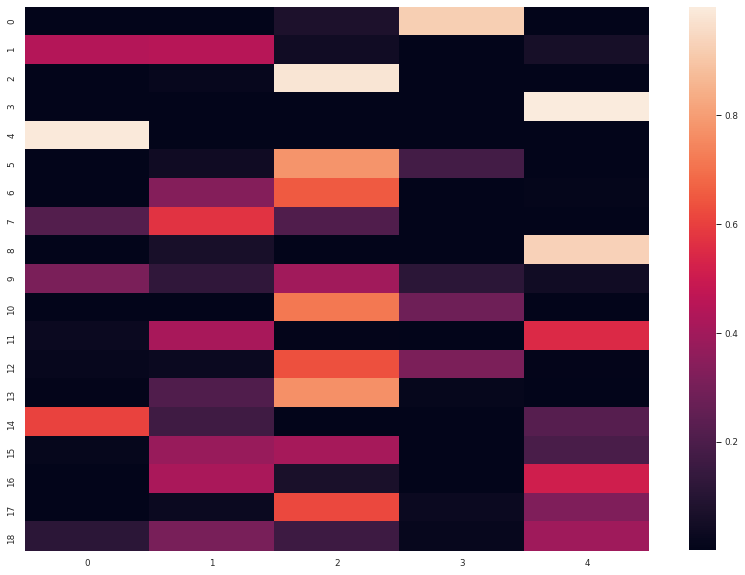

In [61]:
# Get fractional occupancy of each GMM component in each state
frac_occ = []
for i in range(n_components):
    frac_occ.append(np.mean(X[Y == i, :], axis=0))
frac_occ = np.stack(frac_occ, axis=0)
print(frac_occ.shape)
sns.heatmap(frac_occ)

In [90]:
print(frac_occ)
print(np.sort(frac_occ, axis=0))

[[3.9722396e-05 2.5723159e-04 1.9967680e-04 9.1491609e-05 3.0920339e-05]
 [1.4256526e-04 1.0293236e-03 2.0270345e-03 1.3619542e-04 1.4646172e-04]
 [1.4970465e-04 3.2740813e-03 3.8813089e-03 1.4367911e-04 2.5190698e-04]
 [2.8099029e-04 3.7528221e-03 3.9029275e-03 2.4788006e-04 3.2953799e-04]
 [3.6164900e-04 9.7320033e-03 3.1420477e-02 3.6335096e-04 4.3450104e-04]
 [4.6692585e-04 1.7518220e-02 6.2912934e-02 3.7727461e-04 9.4291399e-04]
 [1.1447165e-03 3.6047902e-02 8.6652160e-02 4.8769009e-04 1.6457248e-03]
 [1.6756967e-03 6.7106836e-02 2.1003017e-01 8.5716328e-04 1.9660848e-03]
 [2.3724041e-03 8.6608931e-02 2.3371656e-01 8.5952203e-04 6.2202020e-03]
 [3.2274639e-03 1.5448150e-01 2.9845876e-01 1.0598960e-03 1.5040370e-02]
 [4.4052219e-03 2.0852888e-01 3.9906406e-01 4.2311097e-03 1.1267004e-01]
 [7.1559804e-03 2.1287425e-01 4.6218824e-01 6.9987075e-03 1.3114920e-01]
 [3.8010404e-02 2.2072966e-01 5.4915750e-01 1.7860703e-02 1.5738842e-01]
 [9.8759219e-02 2.3083782e-01 5.5196697e-01 2.84488